# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. 

### Questions:
1-Is there a correlation between receiving an SMS and showing up?

2-Does having a certain diesase make the patient more likely to show up?

3-Does having a scholarship affect showing up?

4-Does gender correlate with showing up?

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [28]:
df = pd.read_csv('KaggleV2-May-2016.csv')

In [29]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [30]:
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [31]:
df[df.isnull().any(axis=1)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


### Data Cleaning

#### I dropped 'Handcap' column because it had unexplained values

In [32]:
df.drop(['Handcap'],axis=1,inplace=True)

#### Dropping rows with ages with negative values

In [33]:
df.drop(df[df['Age'] < 0].index, inplace = True)

### Exploratoy Data Analysis

#### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

##### Is there a correlation between receiving an SMS and showing up?

##### extracting number of patients who receievd an SMS and showed and who received but didn't show:

In [34]:
def SMS_received(string):
    '''take a string and return number of patients who received and SMS and showed or not depending on the input'''
    if(string=='showed'):
        return df.groupby('No-show')['SMS_received'].value_counts()['No'][1]
    elif(string=='no-show'):
        return df.groupby('No-show')['SMS_received'].value_counts()['Yes'][1]

In [35]:
num_pat_received_and_showed = SMS_received('showed')
num_pat_receievd_and_didnot_show = SMS_received('no-show')


##### getting total number of patients who receievd an SMS:

In [36]:
totalnum_of_pat_who_receievd = num_pat_received_and_showed + num_pat_receievd_and_didnot_show

##### getting the percentages:

In [37]:
 percentage_pat_receievd_and_showed = (num_pat_received_and_showed/totalnum_of_pat_who_receievd)*100
 percentage_pat_receievd_and_didnot_show = (num_pat_receievd_and_didnot_show/totalnum_of_pat_who_receievd)*100

##### Graphing the percentages

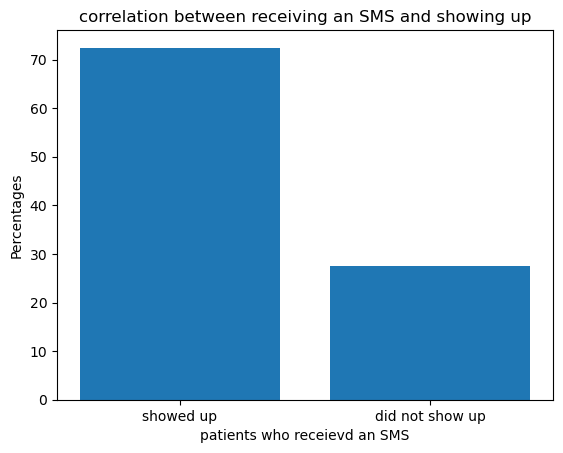

In [38]:
labels = ['showed up','did not show up']
plt.bar([1, 2], [ percentage_pat_receievd_and_showed , percentage_pat_receievd_and_didnot_show], tick_label=labels)
plt.title('correlation between receiving an SMS and showing up')
plt.xlabel('patients who receievd an SMS')
plt.ylabel('Percentages');


##### From the graph above, it is clear that more than 70% of patients who received an SMS showed up

##### Does having a diesase make the patient likely to show up?

##### -Get total number of patients with dieseases ,and total number of patients with diseases, who showed up

In [39]:
num_of_ppl_with_diseases_showedup = 0
num_of_ppl_with_diseases = 0
diseases = ['Hipertension','Diabetes','Alcoholism']
for i in diseases:
    df.groupby('No-show')[i].value_counts()
    num_of_ppl_with_diseases_showedup+= df.groupby('No-show')[i].value_counts()['No'][1]
    num_of_ppl_with_diseases+= df.groupby('No-show')[i].value_counts()['No'][1] + df.groupby('No-show')[i].value_counts()['Yes'][1]

##### Get percentages of patients with diesases who showed up and those who didn't

In [40]:
perc_have_and_showed = (num_of_ppl_with_diseases_showedup/num_of_ppl_with_diseases)*100
perc_have_and_didnot_show = 100-perc_have_and_showed

##### Graphing percentages

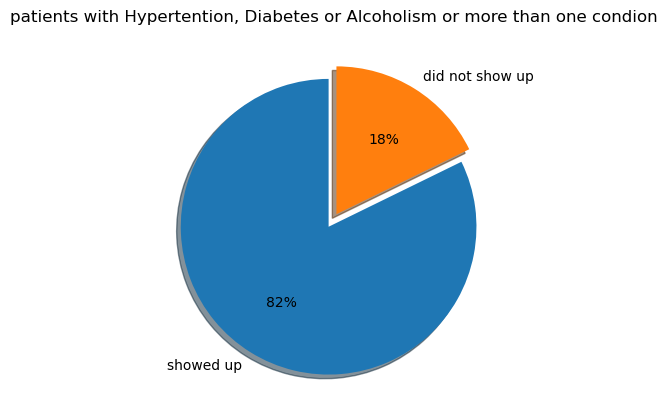

In [41]:
pilabels = ['showed up','did not show up']
sizes = [perc_have_and_showed,perc_have_and_didnot_show]
plt.pie(sizes,explode=(0.1,0),labels = pilabels,autopct='%1.0f%%',shadow=True,startangle=90)
plt.title('patients with Hypertention, Diabetes or Alcoholism or more than one condion ');

##### From the graph above, it is clear that more than 80% of patients with one or more of those conditions showed up

##### Having a scholarship and showing up:

##### Get percentages of patients with scholarship who showed up and those who didn't

In [42]:
def Scholarship_received(string):
    '''take a string and return number of patients who have a scholarship and showed or not depending on the input'''
    if(string=='showed'):
        return df.groupby('No-show')['Scholarship'].value_counts()['No'][1]
    elif(string=='no-show'):
        return df.groupby('No-show')['Scholarship'].value_counts()['Yes'][1]

In [43]:
num_pat_with_showed = Scholarship_received('showed')
num_pat_with_didnot_show = Scholarship_received('no-show')
tot_num_pat_with = num_pat_with_showed + num_pat_with_didnot_show

perc_with_showed = (num_pat_with_showed/tot_num_pat_with)*100
perc_with_didnot_show = (num_pat_with_didnot_show/tot_num_pat_with)*100

##### Graphing percentages:

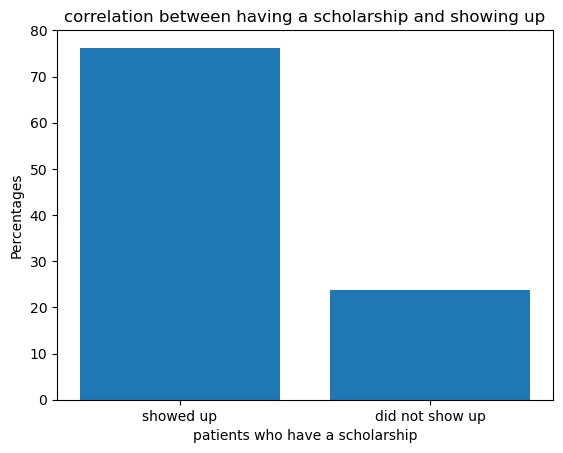

In [44]:
labels = ['showed up','did not show up']
plt.bar([1, 2], [perc_with_showed  ,perc_with_didnot_show ], tick_label=labels)
plt.title('correlation between having a scholarship and showing up')
plt.xlabel('patients who have a scholarship')
plt.ylabel('Percentages');

##### From the graph above, it seems that patients with a scholarship tend to show up

##### Gender:

In [45]:
num_f_showed = df.groupby('No-show')['Gender'].value_counts()['No']['F']
tot_num_f = df.groupby('No-show')['Gender'].value_counts()['No']['F']+df.groupby('No-show')['Gender'].value_counts()['Yes']['F']
percentage_f_showed = num_f_showed/tot_num_f*100
# i.e (percentage_f_showed) % of female patients showed up

In [46]:
num_m_showed = df.groupby('No-show')['Gender'].value_counts()['No']['M']
tot_num_m = df.groupby('No-show')['Gender'].value_counts()['No']['M']+df.groupby('No-show')['Gender'].value_counts()['Yes']['M']
percentage_m_showed = num_m_showed/tot_num_m*100

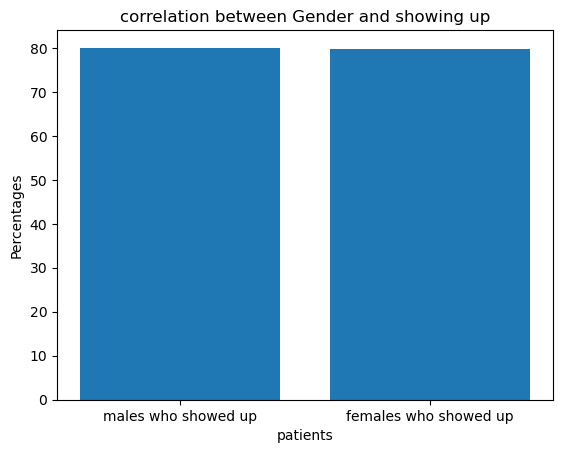

In [47]:
labels = ['males who showed up','females who showed up']
plt.bar([1, 2], [  percentage_m_showed,percentage_f_showed ], tick_label=labels)
plt.title('correlation between Gender and showing up')
plt.xlabel('patients')
plt.ylabel('Percentages');

##### From the graph above, It seems that gender isn't a factor in predicting whether or not the patient will show up. As 80% of male patients showed up, the same goes for females

<a id='conclusions'></a>
## Conclusions



### Results
-Conditions that make patients more likely to show up:

1-If a patient has a sholarship, they are more likely to show up.

2-If a patient is sent an SMS.

3-If they have Hypertension, diabetes or Alcoholism or a combination of those.


-There isn't a specific gender that shows up more than the other.

### Limitations
-Some of the data were confusing. Such as: negative age and values other than 0 and 1 in handicap column (considered it's supposed to be boolean)

-Most of the data were categorical values

## References

I used these links to plot the pie chart:

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

https://www.w3resource.com/graphics/matplotlib/piechart/matplotlib-piechart-exercise-2.php